In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extraccion de datos

In [26]:
def extract_data():
    try:
        df = pd.read_csv('Información _Precios_Frutas_Hortalizas.csv', encoding='UTF-8')
        print(df)
    except FileNotFoundError:
        print("Archivo no encontrado")
    return df

# Transformormacion de datos

In [23]:
def transform_data(df):
    ## remplazar la Û,È,Û y · con la o con tilde en todo el csv
    df = df.replace({'Û': 'ó'}, regex=True)
    df = df.replace({'È': 'é'}, regex=True)
    df = df.replace({'·': 'á'}, regex=True)

    ## eliminar nulos de df
    df = df.dropna()


    nuevos_encabezados = {
        'Tipo producto': 'TipoProducto',
        'Tipo punto monitoreo': 'PuntoMonitoreo',
        'RegiUn': 'NumeroRegion',
        'M*ximo': 'PrecioMáximo',
        'MInimo': 'PrecioMinimo',
        'Promedio': 'PrecioPromedio',
    }


    df = df.rename(columns=nuevos_encabezados)
    df.to_csv('datos_modificados.csv', index=False)

In [27]:
extract_data()

       _id  RegiUn Tipo punto monitoreo              Sector  Semana  \
0        1       7          Feria libre               Talca      28   
1        2       7          Feria libre              CuricÛ      28   
2        3       7          Feria libre               Talca      28   
3        4       7          Feria libre               Talca      28   
4        5       7          Feria libre              CuricÛ      28   
...    ...     ...                  ...                 ...     ...   
2046  2047       8         Supermercado         Chiguayante      30   
2047  2048       8         Supermercado         Chiguayante      30   
2048  2049       8         Supermercado  Talcahuano-HualpÈn      30   
2049  2050       8         Supermercado          ConcepciÛn      30   
2050  2051       8         Supermercado  Talcahuano-HualpÈn      30   

           Fecha    Tipo producto                                  Producto  \
0     08/07/2013  Fruta-Hortaliza            Ajo Chino $/unidad 1a (

,_id,RegiUn,Tipo punto monitoreo,Sector,Semana,Fecha,Tipo producto,Producto,MInimo,M*ximo,Promedio
0,1,7,Feria libre,Talca,28,08/07/2013,Fruta-Hortaliza,Ajo Chino $/unidad 1a (guarda),125,150,"137,5"
1,2,7,Feria libre,CuricÛ,28,08/07/2013,Fruta-Hortaliza,Ajo Chino $/unidad 1a (guarda),100,160,140
2,3,7,Feria libre,Talca,28,08/07/2013,Fruta-Hortaliza,Ajo Chino $/unidad 2a (guarda),100,100,100
3,4,7,Feria libre,Talca,28,08/07/2013,Fruta-Hortaliza,Apio Americano $/unidad Primera,800,800,800
4,5,7,Feria libre,CuricÛ,28,08/07/2013,Fruta-Hortaliza,Apio Americano $/unidad Primera,800,900,850
...,...,...,...,...,...,...,...,...,...,...,...
2046,2047,8,Supermercado,Chiguayante,30,22/07/2013,Fruta-Hortaliza,Lechuga Escarola $/unidad Segunda,560,560,560
2047,2048,8,Supermercado,Chiguayante,30,22/07/2013,Fruta-Hortaliza,LimÛn Sin Especificar $/kilo 1a amarillo,380,699,"488,75"
2048,2049,8,Supermercado,Talcahuano-HualpÈn,30,22/07/2013,Fruta-Hortaliza,LimÛn Sin Especificar $/kilo 1a amarillo,390,699,"580,6"
2049,2050,8,Supermercado,ConcepciÛn,30,22/07/2013,Fruta-Hortaliza,LimÛn Sin Especificar $/kilo 1a amarillo,489,699,"654,71"


In [ ]:
df = extract_data()

# seleccionar solo los productos con nombre palta1 palta2 
df = df[df['Producto'].isin(['Palta1', 'Palta2', 'Palta3'])]

# Agrupa por 'Fecha' y 'Producto' que tengan de nombre palta1 palta2 palta3 y calcula el promedio
df_promediado = df.groupby(['Semana', 'Producto'])['Promedio'].mean().reset_index()

# Ahora 'df_promediado' contiene el promedio de los precios para las fechas repetidas
print(df_promediado)

In [ ]:
sns.lineplot(x='Semana', y='Promedio', hue='Producto', data=df_promediado)

In [75]:
dfPrincipal = df[df['Producto'].isin(['Palta1', 'Palta2', 'Palta3'])]

#agrupa solo por tipo de monitoreo
df_promediado = df.groupby(['Semana', 'Tipo punto monitoreo'])['Promedio'].mean().reset_index()

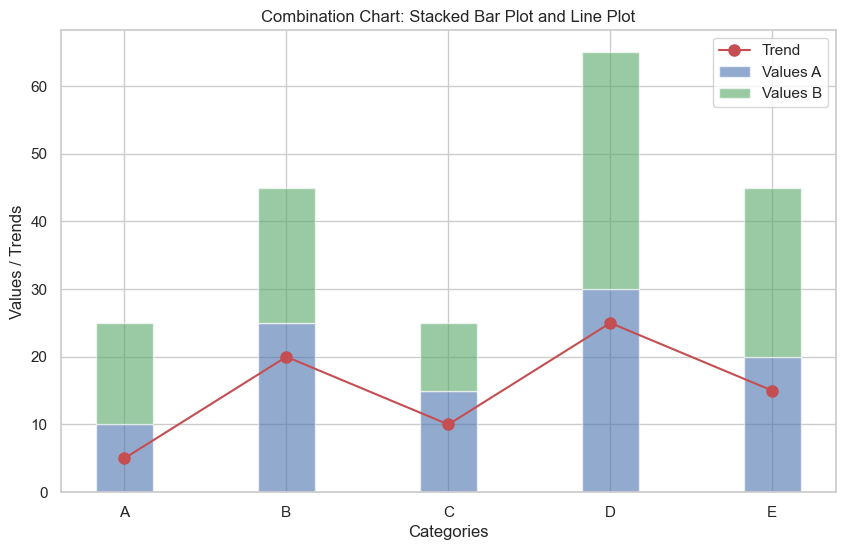

In [85]:
# Datos de ejemplo
data = {
    'Categories': ['A', 'B', 'C', 'D', 'E'],
    'Values_A': [10, 25, 15, 30, 20],
    'Values_B': [15, 20, 10, 35, 25],
    'Trends': [5, 20, 10, 25, 15]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear una barra apilada
index = range(len(df))
bar_width = 0.35

plt.bar(index, df['Values_A'], bar_width, label='Values A', color='b', alpha=0.6)
plt.bar(index, df['Values_B'], bar_width, label='Values B', color='g', alpha=0.6, bottom=df['Values_A'])

# Crear un gráfico de líneas y superponerlo
plt.plot(index, df['Trends'], marker='o', markersize=8, color='r', label='Trend')

# Configurar etiquetas y título
plt.xlabel('Categories')
plt.ylabel('Values / Trends')
plt.title('Combination Chart: Stacked Bar Plot and Line Plot')

# Establecer las etiquetas del eje x
plt.xticks(index, df['Categories'])

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

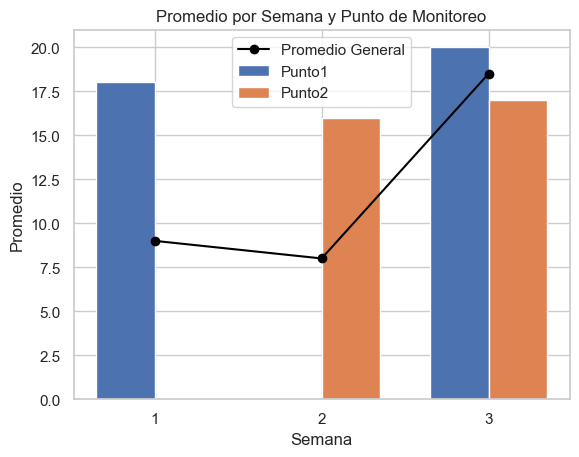

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
data = [
    {"_id": 1, "Región": "Talca", "Semana": 1, "Tipo punto monitoreo": "Punto1", "Mínimo": 10, "Máximo": 20, "Promedio": 15},
    {"_id": 2, "Región": "Talca", "Semana": 2, "Tipo punto monitoreo": "Punto2", "Mínimo": 8, "Máximo": 18, "Promedio": 13},
    {"_id": 3, "Región": "Santiago", "Semana": 1, "Tipo punto monitoreo": "Punto1", "Mínimo": 12, "Máximo": 25, "Promedio": 18},
    {"_id": 4, "Región": "Santiago", "Semana": 2, "Tipo punto monitoreo": "Punto2", "Mínimo": 9, "Máximo": 22, "Promedio": 16},
    {"_id": 5, "Región": "Talca", "Semana": 3, "Tipo punto monitoreo": "Punto1", "Mínimo": 11, "Máximo": 19, "Promedio": 16},
    {"_id": 6, "Región": "Talca", "Semana": 3, "Tipo punto monitoreo": "Punto2", "Mínimo": 7, "Máximo": 17, "Promedio": 12},
    {"_id": 7, "Región": "Santiago", "Semana": 3, "Tipo punto monitoreo": "Punto1", "Mínimo": 14, "Máximo": 27, "Promedio": 20},
    {"_id": 8, "Región": "Santiago", "Semana": 3, "Tipo punto monitoreo": "Punto2", "Mínimo": 10, "Máximo": 21, "Promedio": 17},
    # Agrega más datos aquí
]

# Organiza los datos en grupos por semana y punto de monitoreo
semanas = sorted(list(set(d["Semana"] for d in data)))
puntos_monitoreo = sorted(list(set(d["Tipo punto monitoreo"] for d in data)))

# Preparar los datos para el gráfico de barras agrupadas
promedios = np.zeros((len(puntos_monitoreo), len(semanas)))

for d in data:
    semana_idx = semanas.index(d["Semana"])
    punto_idx = puntos_monitoreo.index(d["Tipo punto monitoreo"])
    promedios[punto_idx, semana_idx] = d["Promedio"]

# Crear el gráfico de barras agrupadas
width = 0.35
x = np.arange(len(semanas))

fig, ax = plt.subplots()
for i, punto in enumerate(puntos_monitoreo):
    ax.bar(x + i * width, promedios[i, :], width, label=punto)

# Crear una línea que contraste los gráficos de barras
promedio_general = np.mean(promedios, axis=0)
ax.plot(x + width * (len(puntos_monitoreo) - 1) / 2, promedio_general, linestyle='-', marker='o', label='Promedio General', color='black')

ax.set_xlabel('Semana')
ax.set_ylabel('Promedio')
ax.set_title('Promedio por Semana y Punto de Monitoreo')
ax.set_xticks(x + width * (len(puntos_monitoreo) - 1) / 2)
ax.set_xticklabels(semanas)
ax.legend()



plt.show()

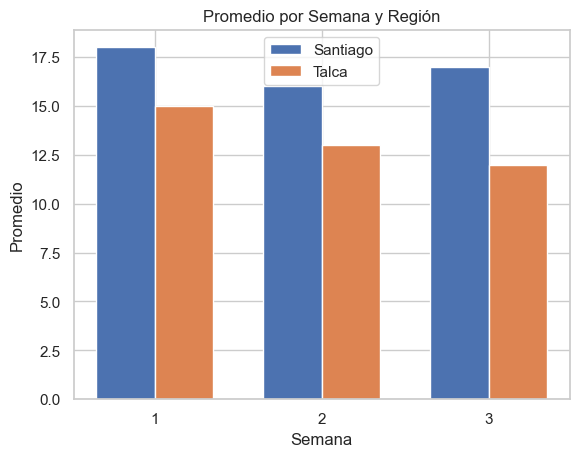

In [114]:
# Datos de ejemplo
data = [
    {"_id": 1, "Región": "Talca", "Semana": 1, "Tipo punto monitoreo": "Punto1", "Mínimo": 10, "Máximo": 20, "Promedio": 15},
    {"_id": 2, "Región": "Talca", "Semana": 2, "Tipo punto monitoreo": "Punto2", "Mínimo": 8, "Máximo": 18, "Promedio": 13},
    {"_id": 3, "Región": "Santiago", "Semana": 1, "Tipo punto monitoreo": "Punto1", "Mínimo": 12, "Máximo": 25, "Promedio": 18},
    {"_id": 4, "Región": "Santiago", "Semana": 2, "Tipo punto monitoreo": "Punto2", "Mínimo": 9, "Máximo": 22, "Promedio": 16},
    {"_id": 5, "Región": "Talca", "Semana": 3, "Tipo punto monitoreo": "Punto1", "Mínimo": 11, "Máximo": 19, "Promedio": 16},
    {"_id": 6, "Región": "Talca", "Semana": 3, "Tipo punto monitoreo": "Punto2", "Mínimo": 7, "Máximo": 17, "Promedio": 12},
    {"_id": 7, "Región": "Santiago", "Semana": 3, "Tipo punto monitoreo": "Punto1", "Mínimo": 14, "Máximo": 27, "Promedio": 20},
    {"_id": 8, "Región": "Santiago", "Semana": 3, "Tipo punto monitoreo": "Punto2", "Mínimo": 10, "Máximo": 21, "Promedio": 17},
    # Agrega más datos aquí
]

# Organiza los datos en grupos por semana y región
semanas = sorted(list(set(d["Semana"] for d in data)))
regiones = sorted(list(set(d["Región"] for d in data)))

# Preparar los datos para el gráfico de barras agrupadas por semana y región
promedios = np.zeros((len(regiones), len(semanas)))

for d in data:
    semana_idx = semanas.index(d["Semana"])
    region_idx = regiones.index(d["Región"])
    promedios[region_idx, semana_idx] = d["Promedio"]

# Crear el gráfico de barras agrupadas
width = 0.35
x = np.arange(len(semanas))

fig, ax = plt.subplots()
for i, region in enumerate(regiones):
    ax.bar(x + i * width, promedios[i, :], width, label=region)

ax.set_xlabel('Semana')
ax.set_ylabel('Promedio')
ax.set_title('Promedio por Semana y Región')
ax.set_xticks(x + width * (len(regiones) - 1) / 2)
ax.set_xticklabels(semanas)
ax.legend()

plt.show()